# KNN

In [1]:
print('lesson n4')
from IPython.display import Image

lesson n4


## How does the KNN algorithm work?

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2.

In [2]:
Image(url= "https://frenzy86.s3.eu-west-2.amazonaws.com/fav/4.1_notebook.PNG", width=400, height=300)

KNN has the following basic steps:

- Calculate distance
- Find closest neighbors
- Vote for labels

In [3]:
Image(url= "https://frenzy86.s3.eu-west-2.amazonaws.com/fav/4.2_notebook.PNG", width=600, height=500)

## Curse of Dimensionality 

In [4]:
Image(url= "https://frenzy86.s3.eu-west-2.amazonaws.com/fav/4.3_notebook.PNG", width=400, height=300)

To deal with the problem of the curse of dimensionality, you need to perform 
principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. Research has shown that in large dimension Euclidean distance is not useful anymore. Therefore, you can prefer other measures such as cosine similarity, which get decidedly less affected by high dimension.

## How do you decide the number of neighbors in KNN? 

Now, you understand the KNN algorithm working mechanism. At this point, the question arises that How to choose the optimal number of neighbors? And what are its effects on the classifier? The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.

Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements

## Classifier Building in Python and Scikit-learn

you can use the wine dataset, which is a very famous multi-class classification problem. This data is the result of a chemical analysis of wines grown in the same region in Italy using three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [0]:
from sklearn import datasets

In [0]:
wine = datasets.load_wine()

In [7]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [0]:
from sklearn.datasets import load_iris, load_diabetes, load_boston,load_breast_cancer

In [9]:
#dataset = load_iris()
#dataset = load_diabetes()
#dataset = load_boston()
dataset = load_breast_cancer()

print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [10]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [11]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [12]:
wine.data.shape,wine.target.shape

((178, 13), (178,))

The dataset comprises 13 features ('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline') and a target (type of cultivars).

This data has three types of cultivar classes: 'class_0', 'class_1', and 'class_2'. Here, you can build a model to classify the type of cultivar. The dataset is available in the scikit-learn library, or you can also download it from the UCI Machine Learning Library.

## Import Libraries



In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
X = wine.data
y = wine.target

In [15]:
X.shape, y.shape

((178, 13), (178,))

Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y) 

## Generating Model for K=3


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.6851851851851852


## Generating Model for K=5


In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7222222222222222


## Generating Model for K=7


In [20]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7407407407407407


In [21]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

#### Here, you have increased the number of neighbors in the model and accuracy got increased. But, this is not necessary for each case that an increase in many neighbors increases the accuracy. 

The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value

The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.

## How to improve KNN?

#### standardization in sklearn 

In [0]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [24]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 0, stratify = y )


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9629629629629629


## Parameter Tuning with Cross Validation 

In this section, we’ll explore a method that can be used to tune the hyperparameter K.

the best K is the one that corresponds to the lowest test error rate, so let’s suppose we carry out repeated measurements of the test error for different values of K. Inadvertently, what we are doing is using the test set as a training set! This means that we are underestimating the true error rate since our model has been forced to fit the test set in the best possible manner. Our model is then incapable of generalizing to newer observations, a process known as overfitting. Hence, touching the test set is out of the question and must only be done at the very end of our pipeline.

##### Using the test set for hyperparameter tuning can lead to overfitting. 

An alternative and smarter approach involves estimating the test error rate by holding out a subset of the training set from the fitting process. This subset, called the validation set, can be used to select the appropriate level of flexibility of our algorithm! There are different validation approaches that are used in practice, and we will be exploring one of the more popular ones called k-fold cross validation.

In [26]:
Image(url= "https://frenzy86.s3.eu-west-2.amazonaws.com/fav/4.4_notebook.PNG")

As seen in the image, k-fold cross validation (the k is totally unrelated to K) involves randomly dividing the training set into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k−1 folds. The misclassification rate is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out.

#####   Cross-validation can be used to estimate the test error associated with a learning method in order to evaluate its performance, or to select the appropriate level of flexibility.


In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
neighbors = list(range(1, 50, 2))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [29]:
# cross validiation scores
cv_scores

[0.9434640522875817,
 0.9545751633986927,
 0.9604575163398692,
 0.9663398692810456,
 0.9718954248366012,
 0.9718954248366012,
 0.9663398692810456,
 0.9663398692810456,
 0.9722222222222221,
 0.9722222222222221,
 0.9722222222222221,
 0.9833333333333334,
 0.9718954248366012,
 0.9718954248366012,
 0.9660130718954247,
 0.9660130718954247,
 0.9777777777777779,
 0.9777777777777779,
 0.9722222222222221,
 0.9722222222222221,
 0.9663398692810456,
 0.9663398692810456,
 0.9604575163398692,
 0.9604575163398692,
 0.9604575163398692]

In [30]:
# misclassification error
MSE = [1 - x for x in cv_scores]
MSE

[0.05653594771241832,
 0.04542483660130725,
 0.0395424836601308,
 0.03366013071895435,
 0.028104575163398815,
 0.028104575163398815,
 0.03366013071895435,
 0.03366013071895435,
 0.0277777777777779,
 0.0277777777777779,
 0.0277777777777779,
 0.016666666666666607,
 0.028104575163398815,
 0.028104575163398815,
 0.033986928104575265,
 0.033986928104575265,
 0.022222222222222143,
 0.022222222222222143,
 0.0277777777777779,
 0.0277777777777779,
 0.03366013071895435,
 0.03366013071895435,
 0.0395424836601308,
 0.0395424836601308,
 0.0395424836601308]

In [31]:
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of k is: ', optimal_k)

The optimal number of k is:  23


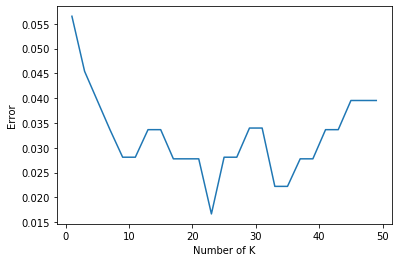

In [32]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of K')
plt.ylabel('Error')
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 667, stratify = y)

knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  1.0


# IRIS DATASET with RANDOM FOREST




In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

In [0]:
iris_dataset = load_iris()

In [36]:
type(iris_dataset)

sklearn.utils.Bunch

In [37]:
# Print the iris data
iris_dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
iris_dataset.data.shape

(150, 4)

In [0]:
X = iris_dataset.data

In [0]:
y = iris_dataset.target

#### Training Test

In [0]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [45]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [46]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [0]:
# utilize sklearn neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [0]:
# run the range up to 20 and test accuracy
k_range = range (1,20)

scores = {}
scores_list = []

for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_train,y_train)
   y_pred = knn.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [0]:
# plot relationship K and test accuracy

Text(0, 0.5, 'Test Accuracy')

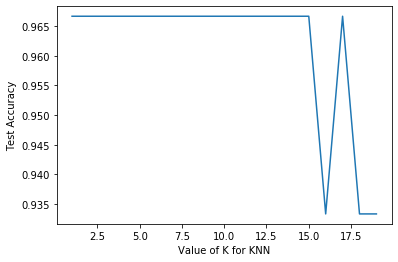

In [125]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Accuracy')


In [88]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
mat = metrics.confusion_matrix(y_test, y_pred)
mat

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

Text(33.0, 0.5, 'True')

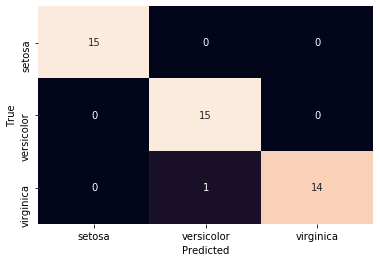

In [90]:
sns.heatmap(mat, annot=True, fmt = 'd', cbar = False, xticklabels=iris_dataset.target_names, yticklabels=iris_dataset.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [0]:
classes = {0:'setosa',
           1:'versicolor',
           2:'virginica'}

In [0]:
#test with some data
# 'sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [0]:
# # input 1
# sepal length = 3 
# sepal width = 4
# petal length = 5
# petal width = 2

# # input 2
# sepal length = 5 
# sepal width = 4
# petal length = 2
# petal width = 2

input_test = [[3,4,5,2],[5,4,2,2]]

In [0]:
y_predict = knn.predict(input_test)

In [96]:
print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


### Random Forests vs Decision Trees

- Random forests is a set of multiple decision trees.
- Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
- Decision trees are computationally faster.
- Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [0]:
diabetes = datasets.load_diabetes()

In [100]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [101]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [102]:
X = diabetes.data
y = diabetes.target

X.shape, y.shape

((442, 10), (442,))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 667)

In [0]:
regressor = RandomForestRegressor(n_estimators=100, random_state = 667)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

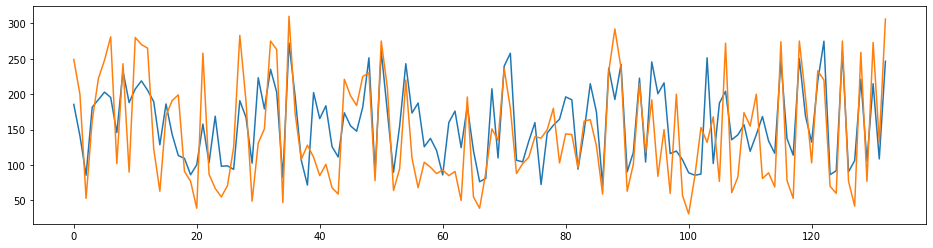

In [105]:
plt.figure(figsize=(16,4))
plt.plot(y_pred)
plt.plot(y_test)

In [106]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

53.58999103468618

In [107]:
(72.78-53.50)/72.78

0.26490794174223686

In [108]:
y_test.std()

76.16093626665665

## Random Forest as a Classifier with iris dataset

In [0]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [0]:
iris = datasets.load_iris()

In [111]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [112]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
X = iris.data
y = iris.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3, stratify = y)

In [0]:
clf = RandomForestClassifier(n_estimators=100, random_state = 667)

In [116]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=667,
                       verbose=0, warm_start=False)

In [0]:
y_pred = clf.predict(X_test)

In [118]:
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


In [0]:
mat = metrics.confusion_matrix(y_test, y_pred)

In [120]:
mat

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

Text(33.0, 0.5, 'True')

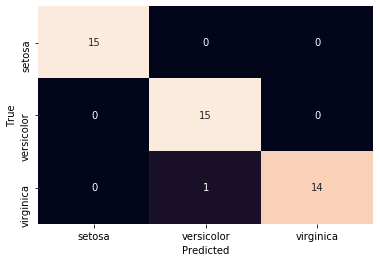

In [121]:
sns.heatmap(mat, annot=True, fmt = 'd', cbar = False, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')

In [122]:
help(clf)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=100)
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.22
 |         The default value of ``n_estimators`` changed from 10 to 100
 |         in 0.22.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for th

In [123]:
clf.feature_importances_ 

array([0.11978761, 0.02683183, 0.43064614, 0.42273442])

In [124]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']